In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

#matplotlib inline

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')

In [3]:
df.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]

In [5]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 13:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 13:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 13:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 13:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-12-31 13:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-12-31 13:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-12-31 13:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-12-31 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-12-31 13:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling missing value

In [6]:
#checking for nulls
df.isnull().sum()

Timestamp                  0
Open                 1241716
High                 1241716
Low                  1241716
Close                1241716
Volume_(BTC)         1241716
Volume_(Currency)    1241716
Weighted_Price       1241716
dtype: int64

In [7]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [8]:
fill_missing(df)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


# Feature extraction

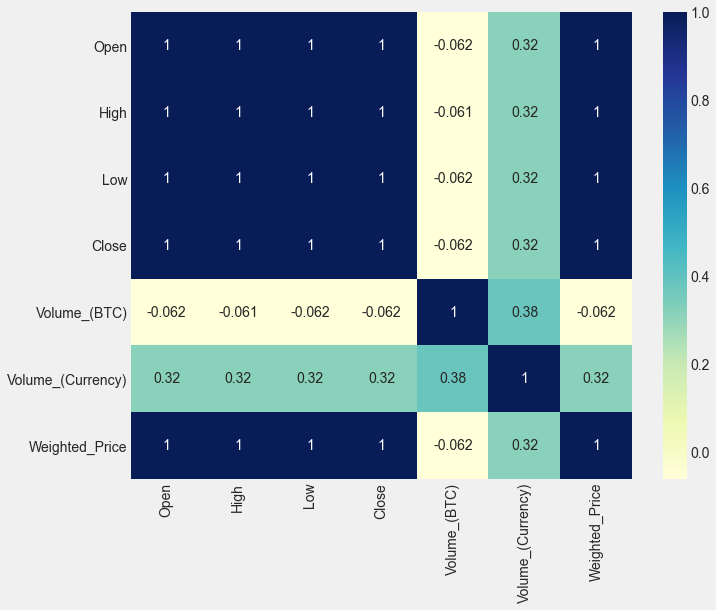

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [ ]:
df = bitstamp_daily.set_index("Timestamp")

In [16]:
features = ['Open','Close','High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)']
label = 'Weighted_Price'

## Model Building

## Linear Regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[label],
    test_size = 0.3
)

In [18]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [19]:
regression_model.score(X_test, y_test)

0.9999996731317099

In [20]:
from sklearn.metrics import r2_score
predictions = regression_model.predict(X_test)
print('Accuracy of model : ', regression_model.score(X_test, y_test))
print('r2 Score : ', r2_score(predictions, y_test))

Accuracy of model :  0.9999996731317099
r2 Score :  0.9999996731317708


In [ ]:
pickle.dump( regression_model, open( "prediction.p", "wb" ) )